In [1]:
# importing dependencies

import numpy as np
import pandas as pd
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def knn_predict(X_train, y_train, test_, K=5, distance = 'Euclidean'):
    '''
    function to predict the classs with KNN algorithm
    arguments:
        X_train = train data features
        y_train = train data labels
        test_ = test data point
        K = no. of nearest neighbors to consider for prediction
        distance = 'Euclidean' or 'Manhattan'
    returns:
        pre_class = predicted class of test_
    '''
    
    # calculating Euclidean distance of all the train data points from test_ 
    if distance == 'Euclidean':
        dist_ = np.sqrt(np.sum((X_train - test_)**2, axis=1))
    elif distance == 'Manhattan':
        dist_ = np.sum(np.abs(X_train - test_), axis=1)
    else:
        return print('Please specify the valid distance measure')
    
    # getting the index of nearest neighbors from train data
    index_ = dist_.sort_values(ascending=True)[:K].index
    
    # predicting class based on mode statistics
    test_ = y_train[index_].reshape(1,-1)
    pred_class = statistics.mode((test_).tolist()[0])
    
    return pred_class

In [3]:
# creating dummy data
X = pd.DataFrame(np.random.rand(30,2), columns=['A','B'])
y = np.random.randint(3,size=(X.shape[0],1))

test_ = np.random.rand(1,2)

# predicting the class
print('The predicted class is:' ,knn_predict(X,y,test_,2,'Euclidean'))

The predicted class is: 2


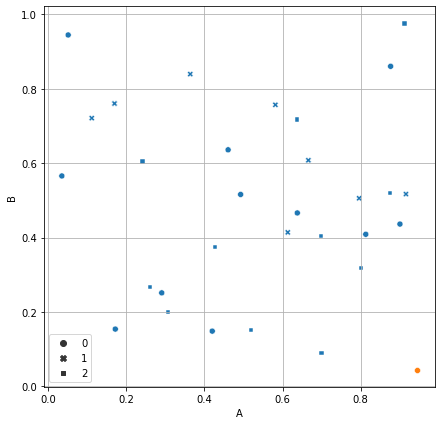

In [4]:
# plotting the results

plt.figure(figsize=(7,7))
sns.scatterplot(X.iloc[:,0], X.iloc[:,1], style=y.reshape(1,-1)[0].tolist())
sns.scatterplot(test_[:,0], test_[:,1])
plt.grid()
plt.show()